# D213 - TASK 2: SENTIMENT ANALYSIS USING NEURAL NETWORKS.

-------------------------------------------------------------------------------------------------------------------------------

<a href="https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=602d3074-7583-402e-9434-ad570102f75b" target="_blank"> Link to the Panopto Video </a>

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=602d3074-7583-402e-9434-ad570102f75b

-------------------------------------------------------------------------------------------------------------------------------

#### Importing Libraries:

In [1]:
#importing the needed libraries.
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) #modified Pandas options to fully display the large dataset when needed
pd.set_option('display.max_colwidth', 500)
## !!! Trying to Display a full Dataframe may cause a problem.

import numpy as np
np.set_printoptions(precision=5, suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import string

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM,Dense,Dropout,SpatialDropout1D,Embedding
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


import warnings
warnings.filterwarnings('ignore') # Ignore warnings for better readability

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


-------------------------------------------------------------------------------------------------------------------------------

#### Part I:  Research Question

##### A.  Describe the purpose of this data analysis by doing the following:

##### 1.  Summarize one research question that you will answer using neural network models and NLP techniques. Be sure the research question is relevant to a real-world organizational situation and sentiment analysis captured in your chosen dataset.

Sentiment analysis is the process of determining whether language reflects a positive, negative, or neutral sentiment.
Analyzing the sentiment of customers has many benefits for businesses (Karikari,2020). eg.
* A company can filter customer feedback based on sentiments to identify things they have to improve about their services.
* A company can manage its online reputation easily by monitoring the sentiment of comments customers write about their products.

the question to be asked is how efficient is using neural network models and NLP techniques for sentiment analysis and monitoring the sentiment of comments or reviews written by customers through social media?


##### 2.  Define the objectives or goals of the data analysis. Be sure the objectives or goals are reasonable within the scope of the research question and are represented in the available data.

The objective of the data analysis is to use the provided data in training a reliable neural network model using NLP techniques that can efficiently be used in sentiment analysis of comments or reviews written by customers of a company.

##### 3.  Identify a type of neural network capable of performing a text classification task that can be trained to produce useful predictions on text sequences on the selected data set.

Long short-term memory (LSTM) is an artificial recurrent neural network (RNN), well known for Its capability of learning long-term dependencies and to process entire sequences of data such as sequences of texts in this project

The architecture of LSTM allows it to preserve the meaningful features of sequential data and to provide a good tool for sentiment analysis and prediction.

https://en.wikipedia.org/wiki/Long_short-term_memory


-------------------------------------------------------------------------------------------------------------------------------

#### Part II:  Data Preparation

##### B.  Summarize the data cleaning process by doing the following:

##### 1.  Perform exploratory data analysis on the chosen dataset, and include an explanation of each of the following elements:

•   presence of unusual characters (e.g., emojis, non-English characters, etc.)

•   vocabulary size

•   proposed word embedding length

•   statistical justification for the chosen maximum sequence length

##### Note: 
##### * Some values will be changed after data cleaning and preprocessing :

The work was done using the 'UCI Sentiment Labeled Sentences Data set'
The data came as a zipped file, containing three tab-delimited text files as following:

In [2]:
df_1 = pd.read_csv("amazon_cells_labelled.txt",sep=r'\t',header=None, engine='python')
df_2 = pd.read_csv("imdb_labelled.txt",sep=r'\t',header=None, engine='python')
df_3 = pd.read_csv("yelp_labelled.txt",sep=r'\t',header=None, engine='python')

df_raw=pd.concat([df_1,df_2,df_3],axis=0)

df_raw.reset_index(drop= True,inplace= True)

df_raw= df_raw.rename(columns = {0:'Review',1:'Score'})
df_raw.head()

,Review,Score
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1


##### •   presence of unusual characters (e.g., emojis, non-English characters, etc.)

In [3]:
'''Custom function for extracting the unusual_characters characters in a df column '''
def extract_unusual_characters(df,column):    
    found_unusual_characters=[]
    unusual_characters_reviews=[]
    
    for i in range(0,df.shape[0]):
        unusual_characters=[char for char in (df.loc[i,column].strip()) if char not in string.printable]
        if unusual_characters == []:
            continue
        found_unusual_characters.extend(unusual_characters)
        unusual_characters_reviews.append([i,unusual_characters])
        
    found_unusual_characters=list(set(found_unusual_characters))    
    return unusual_characters_reviews,found_unusual_characters    

In [4]:
unusual_characters_reviews,found_unusual_characters = extract_unusual_characters(df_raw,'Review')
display('Reviews that contains unusual characters characters: ' ,unusual_characters_reviews)
display('List of found unusual characters: ' ,list(set(found_unusual_characters)))

'Reviews that contains unusual characters characters: '

[[1018, ['Â', '–']],
 [1080, ['Ã', '©']],
 [1178, ['Â', '…']],
 [1182, ['Â', '–']],
 [1424, ['Ã', '©']],
 [1469, ['Ã', '©']],
 [1495, ['Ã', '¥']],
 [1517, ['Â', '–']],
 [1557, ['Â', '—']],
 [1760, ['Â', '–']],
 [1767, ['Ã', '©']],
 [1863, ['Â', '–']],
 [1967, ['Â', '…']],
 [2150, ['Ã', '©']],
 [2598, ['Ã', '©']],
 [2823, ['Ã', 'ª']],
 [2915, ['Ã', '©']]]

'List of found unusual characters: '

['–', '—', '¥', '©', '…', 'ª', 'Â', 'Ã']

##### •   vocabulary size

In [5]:
length_reviews=df_raw['Review'].str.len()
print('Max review chars = ',length_reviews.max())
print('Min review chars = ',length_reviews.min())
print('\n')
print('Max review Words = ',len((df_raw.loc[length_reviews.idxmax(),'Review'].split(' '))))
print('Min review Words = ',len((df_raw.loc[length_reviews.idxmin(),'Review'].split(' '))))
df_raw.iloc[[length_reviews.idxmin(),length_reviews.idxmax()],:]

Max review chars =  479
Min review chars =  7


Max review Words =  73
Min review Words =  3


,Review,Score
1125,10/10,1
1620,"This is a masterful piece of film-making, with many themes simmering and occasionally boiling over in this warts and all study of the poet's bohemian, self-indulgent wartime years that span the aerial bombardments of London and the outward tranquillity of a Welsh coastal retreat - the borderlines between friendship, lust and love, dedication to art and experience versus practical concerns, jealousy, rivalry, cowardice and egotism versus heroism and self-sacrifice and more.",1


In [6]:
# Edited after (Naik,2020)
### Raw Data Vocabulary size
init_voc_size=10000
review = df_raw.Review.values
tokenizer = Tokenizer(num_words=init_voc_size)
tokenizer.fit_on_texts(review)
vocab_size = len(tokenizer.word_index) + 1
print('Raw Data vocabulary size= ',vocab_size)

Raw Data vocabulary size=  5272


##### •   proposed word embedding length

In [7]:
print('Proposed word embedding length = ',len((df_raw.loc[length_reviews.idxmax(),'Review'].split(' '))))

Proposed word embedding length =  73


##### •   statistical justification for the chosen maximum sequence length

Maximum number of tokenized words of any review.

##### 2.  Describe the goals of the tokenization process, including any code generated and packages that are used to normalize text during the tokenization process.

Words tokenization is the division of long sentences and paragraphs into individual words. These tokenized words are then provided to machines or algorithms for further processing. Mostly such data frames are given as input to machine learning applications for performing text analysis.

The vital part between tokenization and machine learning modeling is converting text into numeric data, as we know that machines understand numeric values much more straightforward. (Datascievo,2021)

Datascievo. (2021) Tokenization in NLP | Nourishing Concepts by Python Examples.
https://www.datascievo.com/tokenization-in-nlp/




* Code is included in this notebook.

##### 3.  Explain the padding process used to standardize the length of sequences, including the following in your explanation:

•   if the padding occurs before or after the text sequence

•   a screenshot of a single padded sequence

Padding is simply a process of adding layers of zeros to the input tokenized text to keep all inputs at the same level of dimensions, which is essential for ML or RNN applications.
For the purpose of the study, using (LSTM) as a kind of Recurrent Neural network, padding at the beginning would be appropriate as RNN can not learn long-distance patterns. Padding at the beginning allows us to keep the sequences in the end hence RNN can make use of these sequences for the prediction of the next. (Shrestha,2020)


* Screenshot of a single padded sequence taken from the current notebook.

[![single-padded-se.png](https://i.postimg.cc/x81K7szn/single-padded-se.png)](https://postimg.cc/gX1XLHsT)

##### 4.  Identify how many categories of sentiment will be used and an activation function for the final dense layer of the network.

The Scores consistes of two catigories , '1' for positive reviews and '0' for negative reviews.

In [8]:
display(df_raw['Score'].value_counts())

1    1500
0    1500
Name: Score, dtype: int64

##### 5.  Explain the steps used to prepare the data for analysis, including the size of the training, validation, and test set split.

##### The data prepared for analysis through several steps, as following:

1. Data Cleaning:

In [9]:
# checking out duplicated rows
df_raw.duplicated().any() 

True

In [10]:
# checking out duplicated rows
df_raw[df_raw.duplicated(subset='Review',keep=False)].sort_values(by='Review')

,Review,Score
1788,10/10,1
1125,10/10,1
1363,Definitely worth checking out.,1
1090,Definitely worth checking out.,1
748,Does not fit.,0
446,Does not fit.,0
180,Don't buy this product.,0
543,Don't buy this product.,0
402,Excellent product for the price.,1
892,Excellent product for the price.,1


In [11]:
# Remove duplicated Reviews and save in a new df
df_clean = df_raw.drop_duplicates(subset='Review')
df_clean.reset_index(drop= True,inplace= True)

In [12]:
### Dataset Cleaning
# Edited after (Naik,2020)

wordnet=WordNetLemmatizer()
corpus = []
for i in range(0, df_clean.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', df_clean['Review'][i])
    review = review.lower()
    review = review.split()
    
    review = [wordnet.lemmatize(word) for word in review ] #if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
df_clean.loc[:,'Review_1']=corpus

In [13]:
df_clean.head(20)

,Review,Score,Review_1
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,so there is no way for me to plug it in here in the u unless i go by a converter
1,"Good case, Excellent value.",1,good case excellent value
2,Great for the jawbone.,1,great for the jawbone
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,tied to charger for conversation lasting more than minute major problem
4,The mic is great.,1,the mic is great
5,I have to jiggle the plug to get it to line up right to get decent volume.,0,i have to jiggle the plug to get it to line up right to get decent volume
6,"If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.",0,if you have several dozen or several hundred contact then imagine the fun of sending each of them one by one
7,If you are Razr owner...you must have this!,1,if you are razr owner you must have this
8,"Needless to say, I wasted my money.",0,needle to say i wasted my money
9,What a waste of money and time!.,0,what a waste of money and time


In [14]:
df_clean['Review']=df_clean['Review_1']
df_clean.drop(columns='Review_1',inplace=True)

In [15]:
#checking for empty Rows After Cleaning
length_reviews=df_clean['Review'].str.len()
df_clean[length_reviews==0]

,Review,Score
1115,,1


In [16]:
df_clean.drop(df_clean[length_reviews==0].index,inplace=True)

df_clean.reset_index(drop= True,inplace= True)

In [17]:
length_reviews=df_clean['Review'].str.len()
print('Max review chars = ',length_reviews.max())
print('Min review chars = ',length_reviews.min())
print('\n')
print('Max review Words = ',len((df_clean.loc[length_reviews.idxmax(),'Review'].split(' '))))
print('Min review Words = ',len((df_clean.loc[length_reviews.idxmin(),'Review'].split(' '))))
df_clean.iloc[[length_reviews.idxmin(),length_reviews.idxmax()],:]

Max review chars =  461
Min review chars =  5


Max review Words =  74
Min review Words =  1


,Review,Score
1151,awful,0
1607,this is a masterful piece of film making with many theme simmering and occasionally boiling over in this wart and all study of the poet s bohemian self indulgent wartime year that span the aerial bombardment of london and the outward tranquillity of a welsh coastal retreat the borderline between friendship lust and love dedication to art and experience versus practical concern jealousy rivalry cowardice and egotism versus heroism and self sacrifice and more,1


In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  2982 non-null   object
 1   Score   2982 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 46.7+ KB


2. Data Preprocessing:

In [19]:
# Edited after (Naik,2020)
### Vocabulary size
init_voc_size=10000
review = df_clean.Review.values
tokenizer = Tokenizer(num_words=init_voc_size)
tokenizer.fit_on_texts(review)

In [20]:
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(review)
padded_sequence = pad_sequences(encoded_docs,padding='pre')
print('Cleaned Data vocabulary size= ',vocab_size)

Cleaned Data vocabulary size=  4689


In [21]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'a': 3, 'i': 4, 'it': 5, 'is': 6, 'to': 7, 'this': 8, 'of': 9, 'wa': 10, 'in': 11, 'for': 12, 'that': 13, 'not': 14, 't': 15, 'with': 16, 's': 17, 'my': 18, 'very': 19, 'good': 20, 'on': 21, 'you': 22, 'movie': 23, 'great': 24, 'but': 25, 'film': 26, 'have': 27, 'are': 28, 'phone': 29, 'so': 30, 'one': 31, 'all': 32, 'be': 33, 'had': 34, 'at': 35, 'time': 36, 'like': 37, 'food': 38, 'place': 39, 'just': 40, 'there': 41, 'service': 42, 'work': 43, 'they': 44, 'an': 45, 'were': 46, 'we': 47, 'if': 48, 'from': 49, 'bad': 50, 'really': 51, 'well': 52, 'out': 53, 'ha': 54, 'would': 55, 'about': 56, 'can': 57, 'no': 58, 'or': 59, 'your': 60, 'only': 61, 'don': 62, 'by': 63, 'best': 64, 'here': 65, 'even': 66, 'ever': 67, 'up': 68, 'also': 69, 'will': 70, 'back': 71, 'me': 72, 'when': 73, 'go': 74, 'get': 75, 'more': 76, 'than': 77, 'quality': 78, 'he': 79, 've': 80, 'love': 81, 'what': 82, 'make': 83, 'character': 84, 'made': 85, 'which': 86, 'because': 87, 'how': 88, 't

In [22]:
index_example=20

print('Vocabulary size= ',vocab_size,'\n')
print('Length of padded_sequence= ',len(padded_sequence[index_example]),'\n')
print('input text (example): \n',review[index_example],'\n')
print('encoded_docs (example): \n',encoded_docs[index_example],'\n')
print('padded_sequence (example): \n',padded_sequence[index_example])

Vocabulary size=  4689 

Length of padded_sequence=  74 

input text (example): 
 i went on motorola s website and followed all direction but could not get it to pair again 

encoded_docs (example): 
 [4, 226, 21, 351, 17, 739, 2, 2153, 32, 654, 25, 98, 14, 75, 5, 7, 871, 109] 

padded_sequence (example): 
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    4  226   21  351   17  739    2 2153   32  654   25   98   14   75
    5    7  871  109]


3. Splitting the data into training and test data sets:

Due to the very limited number of data observations (reviews) , the test data set (hold_out set) is only 10% of the cleaned data set., the validation portion of data will be determined later in the Model training section.

In [23]:
X=np.array(padded_sequence.copy())
y=np.array(df_clean['Score'].copy())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

##### 6.  Provide a copy of the prepared dataset.

In [24]:
# Saving a copy of the prepared full data set.
D213_T2_cleaned_dataset=df_clean.copy()
D213_T2_cleaned_dataset.to_csv('D213_T2_cleaned_dataset.csv', index = True)

# Saving a copy of the prepared Training data set.
D213_T2_cleaned_Training_dataset=pd.DataFrame(X_train,y_train)
D213_T2_cleaned_Training_dataset.to_csv('D213_T2_prepared_Training_dataset.csv', index = True)

# Saving a copy of the prepared Test data set.
D213_T2_cleaned_Test_dataset=pd.DataFrame(X_test,y_test)
D213_T2_cleaned_Test_dataset.to_csv('D213_T2_prepared_Test_dataset.csv', index = True)

-------------------------------------------------------------------------------------------------------------------------------

#### Part III:  Network Architecture

##### C.  Describe the type of network used by doing the following:

##### 1.  Provide the output of the model summary of the function from TensorFlow.

In [25]:
# Edited after (Karikari,2020)

# Build the model
model = Sequential()
embedding_vector_length = 32  

model.add(Embedding(vocab_size, embedding_vector_length,input_length=len(padded_sequence[index_example])) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5)) 
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 74, 32)            150048    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 74, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                16600     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 166,699
Trainable params: 166,699
Non-trainable params: 0
_________________________________________________________________
None


##### 2.  Discuss the number of layers, the type of layers, and total number of parameters.

The total number of layers is 5 layers:

1. Embedding:
This layer works as an input layer before the actual RNN, Word embeddings give us a way to use an efficient, dense representation in which similar words have a similar encoding. Importantly. An embedding is a dense vector of floating-point values (the length of the vector is 32)

2. spatial_dropout1d:
As a dropout layer, penalizing the activation function to reduce the overfitting (regularization), performs the same function as Dropout, however, it drops entire 1D feature maps instead of individual elements.

3. LSTM:
For the LSTM layer, we add 50 units that represent the dimensionality of outer space. LSTM also includes a special unit known as a memory cell to withhold the past information for a longer time for making an effective prediction.

4. Dropout:
Dropout layer for prevention against overfitting, we specify the percentage of layers that should be dropped.

5. Dense:
Finally the output dense layer.

At last, we compile the model with the help of adam optimizer. The error is computed using 'prediction accuracy'.

Total params are 166,699 which depends on the number of neurons, number of layers, dimensions of the input, and the output.


##### 3.  Justify the choice of hyperparameters, including the following elements:

•   activation functions

•   number of nodes per layer

•   loss function

•   optimizer

•   stopping criteria

•   evaluation metric

##### •   activation functions

'sigmoid':
The main reason why we use the Sigmoid or Logistic activation function is that it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output. Since the probability of anything exists only between the range of 0 and 1, sigmoid is the right choice. (SHARMA,2017)

SAGAR SHARMA (2017) Activation Functions in Neural Networks.
https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6


##### •   number of nodes per layer

different numbers of nodes have been used in building initial and several test models, the number of choices in the final model has been suggested through experimentation and watching/reviewing different implementations through the web.

##### •   loss function

'binary_crossentropy':

Binary Crossentropy is the loss function used when there is a classification problem between 2 categories only.

Harshit Dawar. (2020) Binary Crossentropy in its core!
https://medium.com/analytics-vidhya/binary-crossentropy-in-its-core-35bcecf27a8a

##### •   optimizer

'adam':
Adam Optimizer is the most popular and widely used optimizer for neural network training, uses adam algorithm in which the stochastic gradient descent method is leveraged for performing the optimization process.
It is efficient to use and consumes very little memory.

Palash Sharma. (2020) Keras Optimizers Explained with Examples for Beginners.
https://machinelearningknowledge.ai/keras-optimizers-explained-with-examples-for-beginners/

##### •   stopping criteria

'val_accuracy':
The model will set apart a fraction of data to be used as validation data and will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.
the validation data accuracy is a reliable metric and can highlight overfitting if compared to training data accuracy, which makes it a reliable stopping criterion to prevent model overfitting.



##### •   evaluation metric

'accuracy':
Model accuracy score represents the model’s ability to correctly predict both the positives and negatives out of all the predictions. Mathematically, it represents the ratio of the sum of true positive and true negatives out of all the predictions. (Kumar,2020)


-------------------------------------------------------------------------------------------------------------------------------

#### Part IV:  Model Evaluation

##### D.  Evaluate the model training process and its relevant outcomes by doing the following:

##### 1.  Discuss the impact of using stopping criteria instead of defining the number of epochs, including a screenshot showing the final training epoch.

In order to evaluate the impact of using stopping criteria instead of defining the number of epochs, I chose to fit the model twice, with and without using the stopping criteria, and running the chosen metrics.

1. Without using the stopping criteria

In [26]:
history = model.fit(X_train,y_train,validation_split=0.2, epochs=20, batch_size=32)

Epoch 1/20
68/68 [==============================] - 24s 211ms/step - loss: 0.6923 - accuracy: 0.5228 - val_loss: 0.6896 - val_accuracy: 0.4972
Epoch 2/20
68/68 [==============================] - 13s 194ms/step - loss: 0.6600 - accuracy: 0.6556 - val_loss: 0.6104 - val_accuracy: 0.7188
Epoch 3/20
68/68 [==============================] - 13s 192ms/step - loss: 0.4951 - accuracy: 0.7866 - val_loss: 0.4884 - val_accuracy: 0.7821ura
Epoch 4/20
68/68 [==============================] - 15s 221ms/step - loss: 0.3600 - accuracy: 0.8630 - val_loss: 0.4600 - val_accuracy: 0.7784
Epoch 5/20
68/68 [==============================] - 13s 194ms/step - loss: 0.2712 - accuracy: 0.9049 - val_loss: 0.4564 - val_accuracy: 0.7896
Epoch 6/20
68/68 [==============================] - 13s 190ms/step - loss: 0.2103 - accuracy: 0.9324 - val_loss: 0.4677 - val_accuracy: 0.8045- accuracy: 0.
Epoch 7/20
68/68 [==============================] - 13s 197ms/step - loss: 0.1660 - accuracy: 0.9445 - val_loss: 0.4621 - val

* Screenshot showing the final training epoch. taken from the current notebook.

[![model-without.png](https://i.postimg.cc/7hZwR0s7/model-without.png)](https://postimg.cc/1n2knnZ5)

Without using the stopping criteria


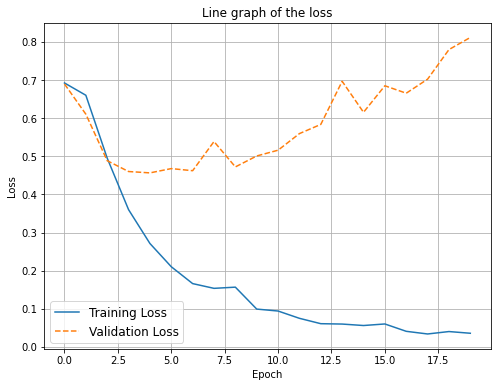

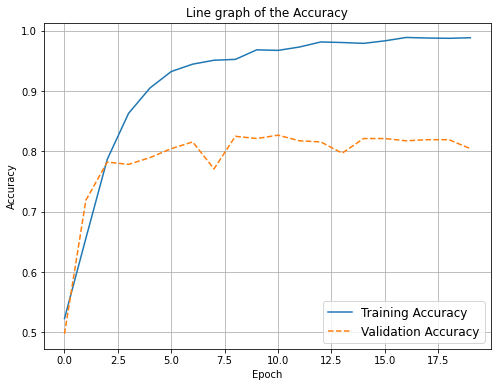

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Without using the stopping criteria')

plt.subplots(figsize = (8,6))
plt.plot(loss,label='Training Loss')
plt.plot(val_loss,'--',label='Validation Loss')
plt.title("Line graph of the loss" );plt.xlabel('Epoch');plt.ylabel('Loss')
plt.legend(['Training Loss','Validation Loss'],loc='lower left',fontsize=12)
plt.grid()
plt.show()

#-------------------------------------------------------------------

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.subplots(figsize = (8,6))
plt.plot(accuracy,label='Training Accuracy')
plt.plot(val_accuracy,'--',label='Validation Accuracy')
plt.title("Line graph of the Accuracy" );plt.xlabel('Epoch');plt.ylabel('Accuracy')
plt.legend(['Training Accuracy','Validation Accuracy'],loc='lower right',fontsize=12)
plt.grid()
plt.show()

In [28]:
y_pred=(model.predict(X_test) > 0.5).astype("int32")

In [29]:
confusion_matrix(y_test,y_pred)

array([[121,  31],
       [ 28, 119]], dtype=int64)

In [30]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       152
           1       0.79      0.81      0.80       147

    accuracy                           0.80       299
   macro avg       0.80      0.80      0.80       299
weighted avg       0.80      0.80      0.80       299



1. Using the stopping criteria

In [31]:
# Edited after (Brownlee,2018)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=3)
history = model.fit(X_train,y_train,validation_split=0.2, epochs=20, batch_size=32,callbacks=[es])

Epoch 1/20
68/68 [==============================] - 13s 190ms/step - loss: 0.0329 - accuracy: 0.9893 - val_loss: 0.7556 - val_accuracy: 0.8063
Epoch 2/20
68/68 [==============================] - 14s 211ms/step - loss: 0.0317 - accuracy: 0.9902 - val_loss: 0.8676 - val_accuracy: 0.8138
Epoch 3/20
68/68 [==============================] - 13s 195ms/step - loss: 0.0355 - accuracy: 0.9893 - val_loss: 0.7911 - val_accuracy: 0.8101
Epoch 4/20
68/68 [==============================] - 13s 195ms/step - loss: 0.0357 - accuracy: 0.9902 - val_loss: 0.7987 - val_accuracy: 0.8119
Epoch 5/20
68/68 [==============================] - 14s 212ms/step - loss: 0.0246 - accuracy: 0.9930 - val_loss: 0.9558 - val_accuracy: 0.8045


* Screenshot showing the final training epoch. taken from the current notebook.

[![model-with.png](https://i.postimg.cc/CMs4Hkp7/model-with.png)](https://postimg.cc/233vCq6L)

In [32]:
y_pred=(model.predict(X_test) > 0.5).astype("int32")

In [33]:
confusion_matrix(y_test,y_pred)

array([[116,  36],
       [ 23, 124]], dtype=int64)

In [34]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.76      0.80       152
           1       0.78      0.84      0.81       147

    accuracy                           0.80       299
   macro avg       0.80      0.80      0.80       299
weighted avg       0.81      0.80      0.80       299



Using stopping criteria instead of defining the number of epochs, terminated useless time consumbtion, but without significant enhancement of accuracy or decreasing overfitting, probably because of the very limited training data, and the very limited validation data as well.

##### 2.  Provide visualizations of the model’s training process, including a line graph of the loss and chosen evaluation metric.

Using the stopping criteria


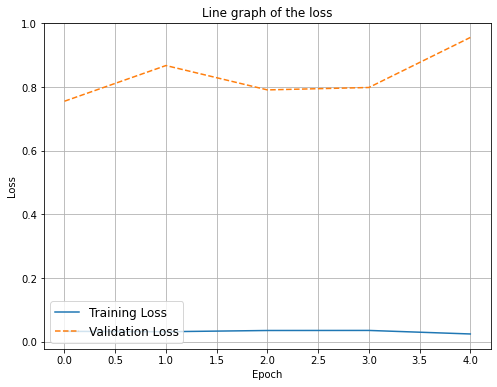

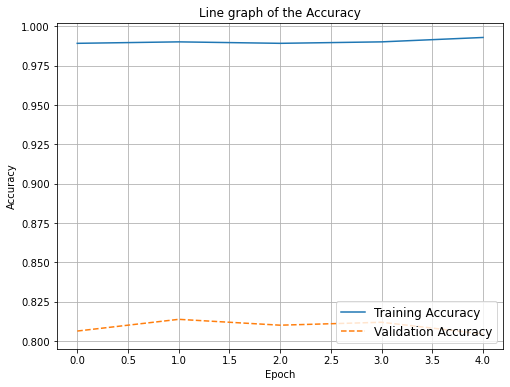

In [35]:
loss = history.history['loss']
val_loss = history.history['val_loss']

print('Using the stopping criteria')

plt.subplots(figsize = (8,6))
plt.plot(loss,label='Training Loss')
plt.plot(val_loss,'--',label='Validation Loss')
plt.title("Line graph of the loss" );plt.xlabel('Epoch');plt.ylabel('Loss')
plt.legend(['Training Loss','Validation Loss'],loc='lower left',fontsize=12)
plt.grid()
plt.show()

#-------------------------------------------------------------------

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.subplots(figsize = (8,6))
plt.plot(accuracy,label='Training Accuracy')
plt.plot(val_accuracy,'--',label='Validation Accuracy')
plt.title("Line graph of the Accuracy" );plt.xlabel('Epoch');plt.ylabel('Accuracy')
plt.legend(['Training Accuracy','Validation Accuracy'],loc='lower right',fontsize=12)
plt.grid()
plt.show()

##### 3.  Assess the fitness of the model and any measures taken to address overfitting.

The obvious presence of overfitting, confirmed by comparing the training loss function vs. the validation loss, also the accuracy score of the training data vs. the validation data.

Dropout layers have been used for prevention against overfitting by penalizing the activation function to reduce the overfitting (regularization).

Also using stopping criteria instead of defining the number of epochs,  but without considerable enhancement of overfitting, probably because of the very limited training data, and the very limited validation data as well.


##### 4.  Discuss the predictive accuracy of the trained network.

In [36]:
y_pred=(model.predict(X_test) > 0.5).astype("int32")

Model accuracy score represents the model’s ability to correctly predict both the positives and negatives out of all the predictions. Mathematically, it represents the ratio of sum of true positive and true negatives out of all the predictions. (Kumar,2020)
Accuracy Score = (TP + TN)/ (TP + FN + TN + FP)

The overall accuracy of the model is relatively high, which represents the model’s ability to correctly predict both the positives and negatives out of all the predictions. 



In [37]:
accuracy_score(y_test,y_pred)

0.802675585284281

In [38]:
confusion_matrix(y_test,y_pred)

array([[116,  36],
       [ 23, 124]], dtype=int64)

In [39]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.76      0.80       152
           1       0.78      0.84      0.81       147

    accuracy                           0.80       299
   macro avg       0.80      0.80      0.80       299
weighted avg       0.81      0.80      0.80       299



A dummy test has been applied in order to check the general ability of the model to evaluate unseen texts, the model succeeded as shown below :

In [40]:
# Edited after (Karikari,2020)
test_word = "This project was a wonderful experience"
tw = tokenizer.texts_to_sequences([test_word])
tw = pad_sequences(tw,maxlen=len(padded_sequence[index_example]))
prediction = int(model.predict(tw).round().item())
prediction

1

In [41]:
test_word = "I really hate this idea "
tw = tokenizer.texts_to_sequences([test_word])
tw = pad_sequences(tw,maxlen=len(padded_sequence[index_example]))
prediction = int(model.predict(tw).round().item())
prediction

0

-------------------------------------------------------------------------------------------------------------------------------

#### Part V:  Summary and Recommendations

##### E.  Provide the code used to save the trained network within the neural network.

In [42]:
#saving the trained model:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model\assets


##### F.  Discuss the functionality of your neural network, including the impact of the network architecture.

Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture, well known for Its capability of learning long-term dependencies and to process entire sequences of data such as sequences of texts in this project, Unlike standard feedforward neural networks.

A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell remembers values over arbitrary time intervals and the three gates regulate the flow of information into and out of the cell.
The architecture of LSTM allows it to preserve the meaningful features of sequential data and to provide a good tool for sentiment analysis and prediction.
The LSTM neural network model could successfully evaluate texts with relatively high accuracy.

https://en.wikipedia.org/wiki/Long_short-term_memory


##### G.  Recommend a course of action based on your results.

The overall accuracy of the model is relatively high, which represents the model’s ability to correctly predict both the positives and negatives out of all the predictions, the model could succesfully evaluate unseen texts .  
although the number of data observations (reviews) used in trainig the model is very limited.
The recommend course of action is to retrain the model using bigger data set in order to utilize such promising model in sentiment analysis.

-------------------------------------------------------------------------------------------------------------------------------

#### Part VI: Reporting

##### H.  Create your neural network using an industry-relevant interactive development environment (e.g., an R Markdown document, a Jupyter Notebook, etc.). Include a PDF or HTML document of your executed notebook presentation.

* (D213_TASK_2.html) and (D213_TASK_2.ipynb) files submitted.

##### I.  List the web sources used to acquire data or segments of third-party code to support the application.

##### Code web sources:


Krish C Naik. (2020)
https://github.com/krishnaik06/Natural-Language-Processing/

Paul Karikari. (2020)
https://medium.datadriveninvestor.com/deep-learning-lstm-for-sentiment-analysis-in-tensorflow-with-keras-api-92e62cde7626

Jason Brownlee. (2018)
https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/




##### J.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

### References:


* Dimitrios Kotzias (2015) Sentiment Labelled Sentences Data Set.
https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences


* Kotzias et. al (2015) From Group to Individual Labels using Deep Features. KDD 2015.


* Paul Karikari. (2020) Deep Learning LSTM for Sentiment Analysis in Tensorflow with Keras API.
https://medium.datadriveninvestor.com/deep-learning-lstm-for-sentiment-analysis-in-tensorflow-with-keras-api-92e62cde7626


* Jason Brownlee. (2018) Use Early Stopping to Halt the Training of Neural Networks At the Right Time.
https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/


* Krish Naik. (2020) Natural Language Processing (youtube playlist).
https://www.youtube.com/watch?v=fM4qTMfCoak&list=PLZoTAELRMXVMdJ5sqbCK2LiM0HhQVWNzm


* Ajitesh Kumar. (2020) Accuracy, Precision, Recall & F1-Score – Python Examples
https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/


* Sudip Shrestha.(2020)
https://towardsdatascience.com/nlp-preparing-text-for-deep-learning-model-using-tensorflow2-461428138657


* Rounak Banik. (No date) Feature Engineering for NLP in Python (Datacamp course).
https://learn.datacamp.com/courses/feature-engineering-for-nlp-in-python


* Dan Becker. (No date) Introduction to Deep Learning in Python (Datacamp course).
https://learn.datacamp.com/courses/introduction-to-deep-learning-in-python


* Katharine Jarmul. (No date) Introduction to Natural Language Processing in Python (Datacamp course).
https://learn.datacamp.com/courses/introduction-to-natural-language-processing-in-python


* Isaiah Hull. (No date) Introduction to TensorFlow in Python (Datacamp course).
https://learn.datacamp.com/courses/introduction-to-tensorflow-in-python


* Biswanath Halder. (No date) Natural Language Generation in Python (Datacamp course).
https://learn.datacamp.com/courses/natural-language-generation-in-python


* Violeta Misheva. (No date) Sentiment Analysis in Python (Datacamp course).
https://learn.datacamp.com/courses/sentiment-analysis-in-python


* General Questions/Answers from https://stackoverflow.com/


* General Questions/Answers from https://github.com


* Documentation of Python packages: pandas, matplotlib,numpy,sklearn,keras and Tensorflow 2

##### K.  Demonstrate professional communication in the content and presentation of your submission.

-------------------------------------------------------------------------------------------------------------------------------

<a href="https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=602d3074-7583-402e-9434-ad570102f75b" target="_blank"> Link to the Panopto Video </a>

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=602d3074-7583-402e-9434-ad570102f75b

-------------------------------------------------------------------------------------------------------------------------------